In [2]:
# Config
import pydsptools.config.pda as pda
import pydsptools.biorad as biorad

# Analysis Preparation
import polars as pl
import pandas as pd
import numpy as np
from scipy.stats import chi2 # https://en.cppreference.com/w/cpp/numeric/random/chi_squared_distribution
from scipy.interpolate import interp1d

# DSP Processing
import pydsp.run.worker
import pydsptools.biorad.parse as bioradparse

# PreProcessing
import pprint
import pyarrow as pa
import os
import subprocess
from pathlib import Path
from package import common

# Visualization
import pydsptools.plot as dspplt
import plotly.express as px
import matplotlib.pyplot as plt

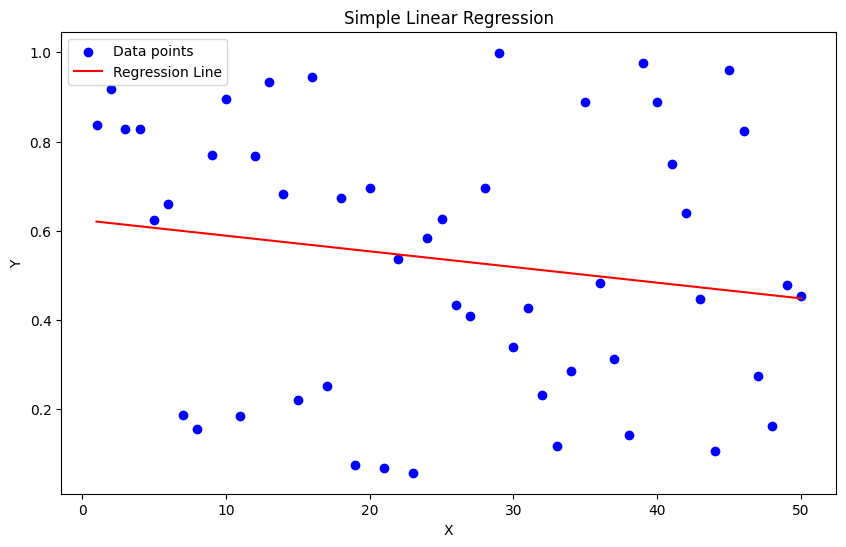

In [6]:
# 원본 데이터
time = np.linspace(0, 50, 50)
y_normal = np.random.normal(loc=200, scale=50, size=50)
y_sin = (np.sin(2*np.pi*time) + (np.random.randn(50)/5))*300
y_linear = np.random.randint(-10, 10)*2*time+np.random.randint(-100, 100)+y_normal/5
y_sin_noise = y_normal + y_sin
y_linear_noise = y_normal + y_linear
jump_time = np.random.randint(2, 48)
jump_magnitude = max(y_linear_noise)
y_jumped = y_linear.copy()
y_spike = y_normal.copy()/2
jump_time = np.random.randint(2, 48)
y_jumped[jump_time:] += jump_magnitude
jump_time = np.random.randint(2, 48)
y_spike[jump_time] += jump_magnitude
y_linear_jump = y_linear_noise.copy()

jump_time = np.random.randint(2, 48)
y_linear_jump[jump_time] += jump_magnitude

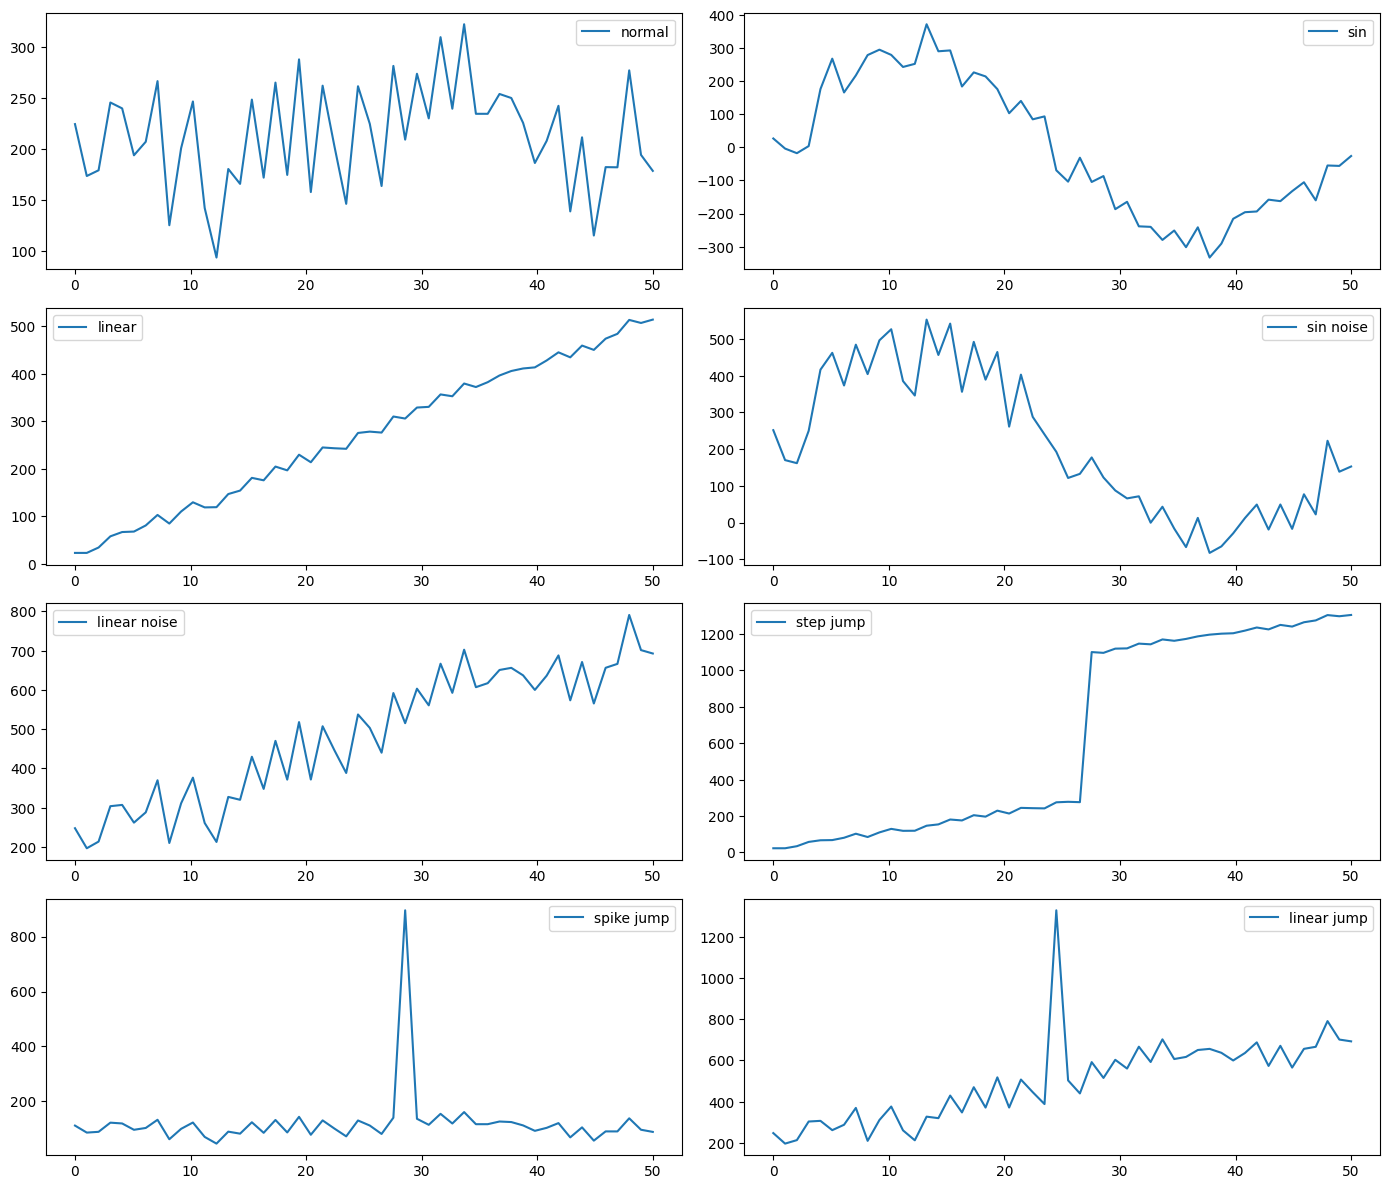

In [10]:
# 데이터 변환 및 라벨링
transformations = [
    ('normal', y_normal),
    ('sin', y_sin),
    ('linear', y_linear ),
    ('sin noise', y_sin_noise),
    ('linear noise', y_linear_noise),
    ('step jump', y_jumped),
    ('spike jump', y_spike),
    ('linear jump', y_linear_jump)
]

# 시각화
plt.figure(figsize=(14, 12))
for i, (label, transformed_data) in enumerate(transformations, 1):
    plt.subplot(4, 2, i)
    plt.plot(time, transformed_data, label=label)
    plt.legend()

plt.tight_layout()
plt.show()


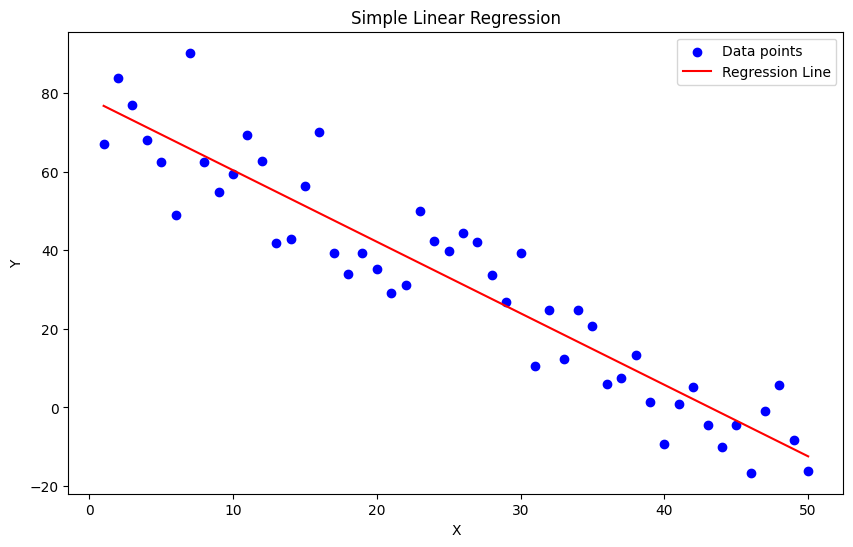

In [7]:
# Generate random data
y = y_linear
x = list(range(1, len(y) + 1))

# Compute slope (using np.cov, need to properly handle the output)
slope = np.cov(x, y, bias=True)[0, 1] / np.var(x, ddof=0)

# Compute intercept
intercept = np.mean(y) - slope * np.mean(x)

# Generate regression line
x_values = np.array(x)
regression_line = slope * x_values + intercept

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_values, regression_line, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [13]:
z_scores = common.detect_noise_naively(y_linear)[3]
no_std = common.detect_noise_naively_pbg(y_linear)[3]
abs_sum_bpn = common.detect_noise_naively_ywj1(y_linear)[2]
len(abs_sum_bpn)

50

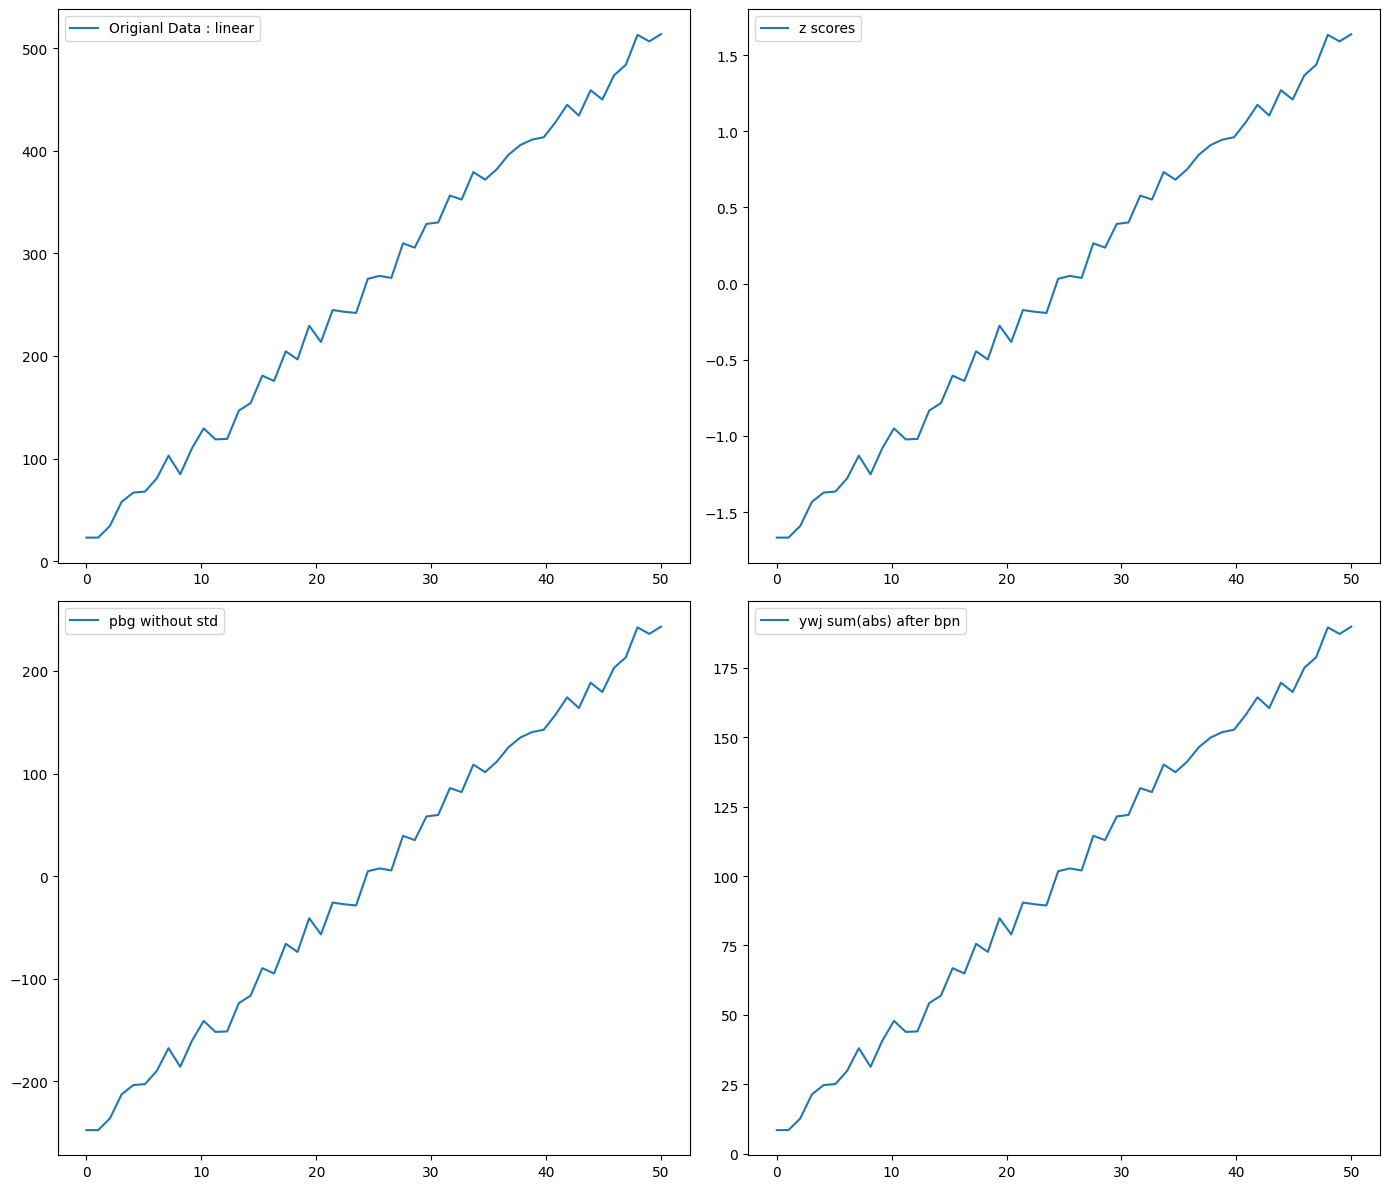

In [14]:


transformations2 = [
    ('Origianl Data : linear', y_linear),
    ('z scores', z_scores)
#    ('pbg without std', no_std ),
#    ('ywj sum(abs) after bpn', abs_sum_bpn),
]

# 시각화
plt.figure(figsize=(14, 12))
for i, (label, transformed_data) in enumerate(transformations2, 1):
    plt.subplot(2, 2, i)
    plt.plot(time, transformed_data, label=label)
    plt.legend()

plt.tight_layout()
plt.show()


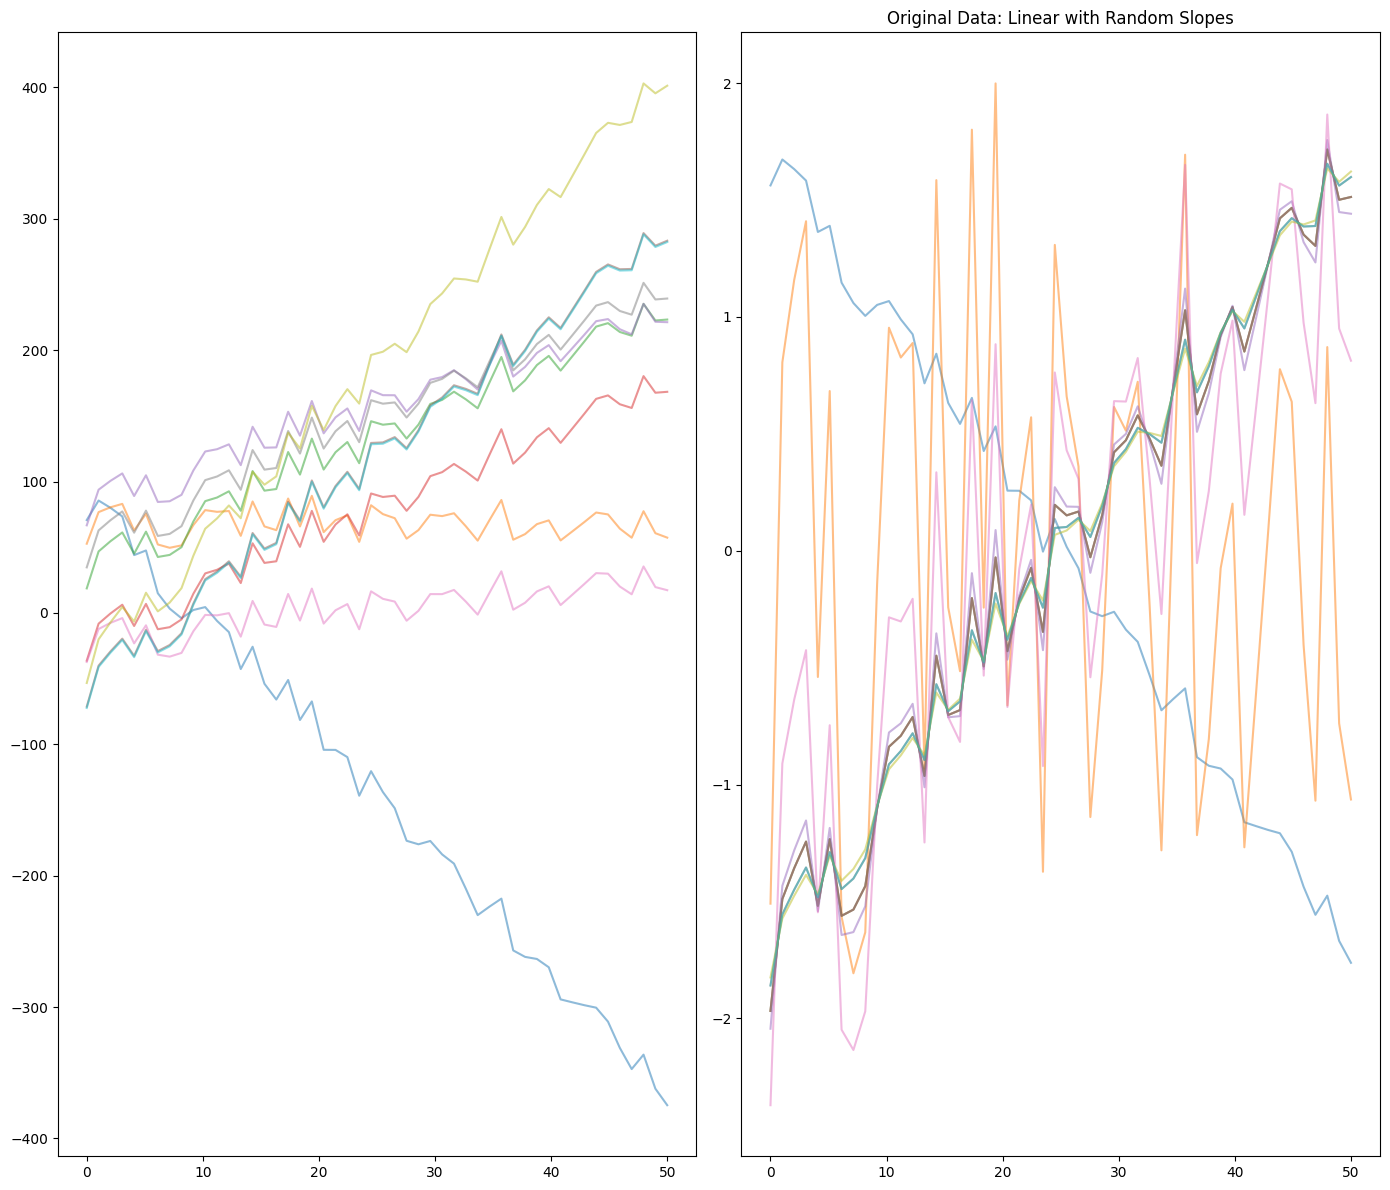

In [28]:
time = np.linspace(0, 50, 50)
y_normal = np.random.normal(loc=200, scale=50, size=50)

# 10개의 임의 기울기를 가진 선형 데이터 세트 생성
slopes = np.random.randint(-10, 10, size=10)
intercepts = np.random.randint(-100, 100, size=10)
linear_data_sets = [slopes[i]*time + intercepts[i] + y_normal/5 for i in range(10)]
z_data_sets = [common.detect_noise_naively(raw_data)[3] for raw_data in linear_data_sets]
data_sets = [linear_data_sets,z_data_sets]

# 시각화
plt.figure(figsize=(14, 12))

for i, data in enumerate(data_sets, 1):
    plt.subplot(1, 2, i)
    for signal in data:
        plt.plot(time, signal, alpha=0.5)
plt.title('Original Data: Linear with Random Slopes')

plt.tight_layout()
plt.show()


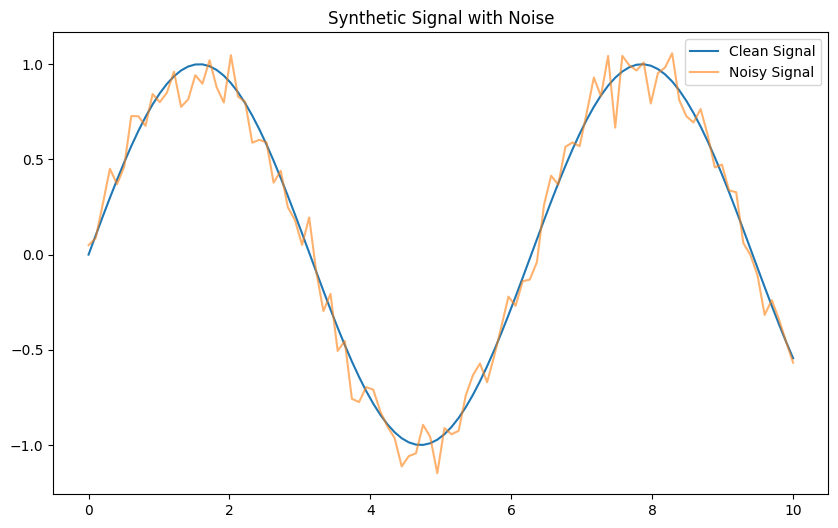

In [2]:
# Generate a synthetic signal
np.random.seed(42)  # For reproducibility
x = np.linspace(0, 10, 100)
y_clean = np.sin(x)
y_noise = y_clean + np.random.normal(0, 0.1, size=x.shape)

# Plot the clean and noisy signal
plt.figure(figsize=(10, 6))
plt.plot(x, y_clean, label='Clean Signal')
plt.plot(x, y_noise, label='Noisy Signal', alpha=0.6)
plt.legend()
plt.title('Synthetic Signal with Noise')
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

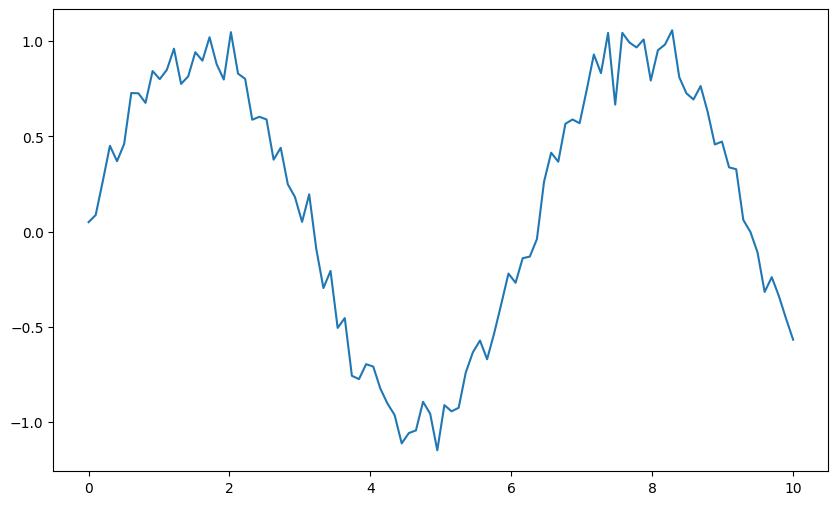

In [4]:
# Placeholder for applying the first algorithm
outliers_detected = common.detect_noise_naively(y_noise)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(x, y_noise, label='Noisy Signal')
plt.scatter(x[outliers_detected[2]], y_noise[outliers_detected[2]], color='red', label='Detected Noise')
plt.legend()
plt.title('Noise Detection on a Single Signal')
plt.show()
